# Cohort50 Hackathon!


In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Read in Data and Understand what we're doing

In [17]:
os.listdir('data')

['test.csv', 'train.csv']

In [18]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [19]:
train.shape, test.shape

((2197, 82), (733, 81))

In [20]:
test_cols = test.columns
train_cols = train.columns
[e for e in train_cols if e not in test_cols]

['SalePrice']

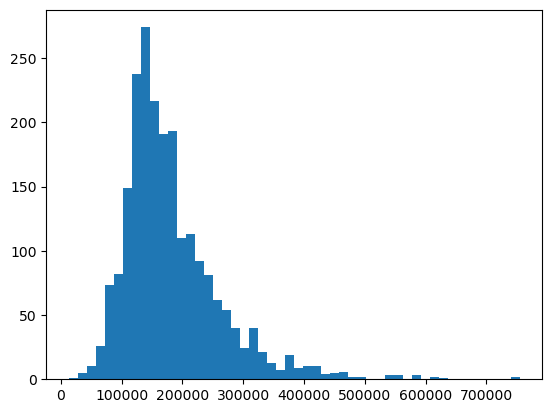

In [21]:
target_var = 'SalePrice'
y = train[target_var]
plt.hist(y, bins=50);

In [7]:
try: test[target_var]
except: print('No target variable in test set')

No target variable in test set


### Demonstration of a simple model

In [66]:
X = train.drop(target_var, axis=1)
y = train[target_var]


In [25]:
X.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [30]:
X.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      362
                 ... 
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
Length: 81, dtype: int64

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
XX = X._get_numeric_data()
for col in XX:
    if XX[col].isnull().sum() > 0:
        XX[col].fillna(XX[col].mean(), inplace = True)
vif_data = pd.DataFrame()
vif_data["feature"] = XX.columns
vif_data['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(len(XX.columns))]
print(vif_data)

            feature         VIF
0             Order    4.280410
1               PID   18.389062
2       MS SubClass    4.131484
3      Lot Frontage   19.280314
4          Lot Area    3.412856
5      Overall Cond   29.623133
6    Year Remod/Add  106.713522
7      Mas Vnr Area    1.835727
8   Low Qual Fin SF    1.073789
9       Gr Liv Area   39.258964
10   Bsmt Full Bath    1.986034
11   Bsmt Half Bath    1.166254
12        Full Bath   19.709556
13        Half Bath    2.242881
14    Bedroom AbvGr   21.450567
15    Kitchen AbvGr   29.030036
16       Fireplaces    2.754255
17      Garage Area   10.010018
18     Wood Deck SF    1.924626
19    Open Porch SF    1.815102
20   Enclosed Porch    1.260747
21       3Ssn Porch    1.027671
22     Screen Porch    1.166248
23        Pool Area    1.105707
24         Misc Val    1.047811
25          Mo Sold    6.346845


In [57]:
X.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [67]:
dropping = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Yr Sold', 'Garage Yr Blt', 'Year Built', 'Garage Cars', 'Overall Qual', 'TotRms AbvGrd']
for col in dropping:
    X.drop(col, axis = 1, inplace=True)



In [10]:
# cols = ['Gr Liv Area', 'Sale Condition']
# X = X[cols]

tmp = pd.get_dummies(X['Sale Condition'], drop_first=True)
X = pd.concat([X, tmp], axis=1)
X = X.drop('Sale Condition', axis=1)
X.head(5)

,Gr Liv Area,AdjLand,Alloca,Family,Normal,Partial
0,1218,0,0,0,1,0
1,2196,0,0,0,1,0
2,1344,0,0,0,0,0
3,1456,0,0,0,1,0
4,1374,0,0,0,1,0


In [69]:
Xtr, Xval, ytr, yval = train_test_split(XX, y, random_state=0, test_size=0.2)

Xtr.shape, Xval.shape, ytr.shape, yval.shape

((1757, 26), (440, 26), (1757,), (440,))

In [70]:
lr = LinearRegression()
lr.fit(Xtr, ytr)
score_tr = lr.score(Xtr, ytr)
score_val = lr.score(Xval, yval)

score_tr, score_val

(0.7606053753424729, 0.7926919358344287)

In [71]:
lr.coef_

array([ 1.53286326e+00, -3.21008212e-05, -1.98351214e+02, -5.11887335e+01,
        2.42699866e-01,  6.16834609e+02,  7.73222932e+02,  4.67889447e+01,
       -5.25113615e+01,  6.97980254e+01,  1.99740050e+04, -1.81080662e+03,
        1.40468744e+04,  1.14401871e+02, -1.06605767e+04, -2.39623275e+04,
        1.08047935e+04,  6.47443726e+01,  3.37694980e+01, -6.18912253e+00,
       -2.50999170e+01, -1.96614498e+01,  5.63115516e+01, -5.68670720e+01,
       -8.71550128e+00, -1.30795588e+02])

In [72]:
XX.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Cond', 'Year Remod/Add', 'Mas Vnr Area', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold'],
      dtype='object')

In [16]:
X['Alloca'].unique()

array([0, 1], dtype=uint8)

### Submission

In [29]:
test = pd.read_csv('data/test.csv')

In [30]:
# repeat the pre-processing steps above
cols = ['Gr Liv Area', 'Sale Condition']
Xtest = test[cols]

tmp = pd.get_dummies(Xtest['Sale Condition'], drop_first=True)
Xtest = pd.concat([Xtest, tmp], axis=1)
Xtest = Xtest.drop('Sale Condition', axis=1)
Xtest.head(5)

,Gr Liv Area,AdjLand,Alloca,Family,Normal,Partial
0,990,0,0,0,1,0
1,2068,0,0,0,1,0
2,1368,0,0,0,0,1
3,1358,0,0,0,0,1
4,1837,0,0,0,1,0


In [42]:
preds = lr.predict(Xtest)
preds[:5]

array([126433.31048196, 234040.33657026, 223155.29162026, 222157.08173076,
       210981.68812277])

In [43]:
len(preds)

733

In [46]:
# one number per line, in the same order as the test.csv
s_preds = "\n".join([str(e) for e in preds.tolist()])

In [47]:
fn = 'example-group-11.csv'
with open(fn, 'w') as f:
    f.write(s_preds)

In [ ]:
# check out that file, should be next ot this notebook